<a href="https://colab.research.google.com/github/Tashii-nayak/ADNI_MRI_e1_e2/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()  # A dialog will pop up to select your file
import os
print(os.listdir('/content'))

Saving AD_dataset (1).zip to AD_dataset (1).zip
['.config', 'AD_dataset (1).zip', 'sample_data']


In [9]:
from zipfile import ZipFile
import os

# Correct zip path with space and parentheses
zip_path = "/content/AD_dataset (1).zip"
extract_dir = "/content/AD_dataset_data"  # You can name the extraction folder however you like

# Extract the contents
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", extract_dir)

Files extracted to: /content/AD_dataset_data


In [10]:
import os

root ="/content/AD_dataset_data"
for dirpath, dirnames, filenames in os.walk(root):
    print(f"{dirpath} → {len(filenames)} files")

/content/AD_dataset_data → 0 files
/content/AD_dataset_data/ADNI → 0 files
/content/AD_dataset_data/ADNI/100_S_5091 → 0 files
/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping → 0 files
/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping/2020-02-10_12_59_58.0 → 0 files
/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping/2020-02-10_12_59_58.0/I1287018 → 104 files
/content/AD_dataset_data/ADNI/130_S_6646 → 0 files
/content/AD_dataset_data/ADNI/130_S_6646/Axial_Field_Mapping → 0 files
/content/AD_dataset_data/ADNI/130_S_6646/Axial_Field_Mapping/2018-12-11_10_21_59.0 → 0 files
/content/AD_dataset_data/ADNI/130_S_6646/Axial_Field_Mapping/2018-12-11_10_21_59.0/I1084798 → 104 files
/content/AD_dataset_data/ADNI/016_S_6790 → 0 files
/content/AD_dataset_data/ADNI/016_S_6790/mIP_Images_SW_ → 0 files
/content/AD_dataset_data/ADNI/016_S_6790/mIP_Images_SW_/2022-03-17_14_18_29.0 → 0 files
/content/AD_dataset_data/ADNI/016_S_6790/mIP_Images_SW_/2022-03-17_14_18_29.0/I156

In [6]:
!pip install pydicom
!pip install pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.5 MB/s eta 0:00:00


In [13]:
import os #os provides a way to interact with the file system.
import pydicom #pydicom is a Python library specifically for reading and working with DICOM medical images
import numpy as np #MRI images are numerical arrays. NumPy is used for numerical operations on these image arrays.
from PIL import Image #This converts and saves your DICOM as a proper .png file.

source_root = "/content/AD_dataset_data"
output_root = "/content/AD_dataset_PNG/Unsorted" #folder where PNGs will be saved.
os.makedirs(output_root, exist_ok=True) # creates the folder if it doesn’t exist.

count = 0
#Reads each DICOM file.
for dirpath, _, filenames in os.walk(source_root): #This helps automate access to many nested DICOM files.
    for fname in filenames:
        if fname.endswith(".dcm"): # checks extension
            try:
                fpath = os.path.join(dirpath, fname) #This builds the full file path by joining the current directory path (dirpath) and the filename (fname).
                dicom = pydicom.dcmread(fpath) #This line reads the DICOM file located at fpath using the pydicom library.
                img_array = dicom.pixel_array #Extracts the actual pixel data

                # Normalize to 0-255 and convert to uint8 (This turns raw DICOM images into standard grayscale images for ML use.)
                img = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array)) * 255.0
                img = img.astype(np.uint8)

                img_pil = Image.fromarray(img)
                img_pil = img_pil.convert("L")  # grayscale, "L" stands for luminance, image will have 1 channel, with pixel values from 0 (black) to 255 (white)

                # Save
                out_path = os.path.join(output_root, f"{count:06d}.png")
                img_pil.save(out_path)
                count += 1
            except Exception as e:
                print(f"Error reading {fpath}: {e}")

Error reading /content/AD_dataset_data/ADNI/177_S_6409/Axial_3D_FLAIR/2020-07-24_10_54_05.0/I1327488/ADNI_177_S_6409_MR_Axial_3D_FLAIR_br_raw_20200806150202302_1_S951229_I1327488.dcm: Cannot handle this data type: (1, 1, 256), |u1
Error reading /content/AD_dataset_data/ADNI/177_S_6448/Axial_3D_FLAIR/2020-09-16_10_31_12.0/I1340862/ADNI_177_S_6448_MR_Axial_3D_FLAIR_br_raw_20200919074637061_1_S961031_I1340862.dcm: Cannot handle this data type: (1, 1, 256), |u1
Error reading /content/AD_dataset_data/ADNI/177_S_6335/Axial_3D_FLAIR/2020-07-22_12_56_01.0/I1327464/ADNI_177_S_6335_MR_Axial_3D_FLAIR_br_raw_20200806135413995_1_S951210_I1327464.dcm: Cannot handle this data type: (1, 1, 256), |u1


In [14]:
import os
import pydicom
import numpy as np
from PIL import Image

source_root = "/content/AD_dataset_data"
output_root = "/content/AD_dataset_PNG/Unsorted"
os.makedirs(output_root, exist_ok=True)

count = 0

for dirpath, _, filenames in os.walk(source_root):
    for fname in filenames:
        if fname.endswith(".dcm"):
            try:
                fpath = os.path.join(dirpath, fname)
                dicom = pydicom.dcmread(fpath)

                if not hasattr(dicom, "pixel_array"):
                    print(f"Skipping (no pixel_array): {fpath}")
                    continue

                img_array = dicom.pixel_array

                # Check for valid 2D shape
                if len(img_array.shape) != 2:
                    print(f"Skipping (not 2D): {fpath}, shape: {img_array.shape}")
                    continue

                img = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array)) * 255.0
                img = img.astype(np.uint8)

                img_pil = Image.fromarray(img)
                img_pil = img_pil.convert("L")

                out_path = os.path.join(output_root, f"{count:06d}.png")
                img_pil.save(out_path)
                count += 1

            except Exception as e:
                print(f" Error reading {fpath}: {e}")

print(f"\n Conversion complete: {count} images saved to {output_root}")


Skipping (not 2D): /content/AD_dataset_data/ADNI/177_S_6409/Axial_3D_FLAIR/2020-07-24_10_54_05.0/I1327488/ADNI_177_S_6409_MR_Axial_3D_FLAIR_br_raw_20200806150202302_1_S951229_I1327488.dcm, shape: (160, 256, 256)
Skipping (not 2D): /content/AD_dataset_data/ADNI/177_S_6448/Axial_3D_FLAIR/2020-09-16_10_31_12.0/I1340862/ADNI_177_S_6448_MR_Axial_3D_FLAIR_br_raw_20200919074637061_1_S961031_I1340862.dcm, shape: (160, 256, 256)
Skipping (not 2D): /content/AD_dataset_data/ADNI/177_S_6335/Axial_3D_FLAIR/2020-07-22_12_56_01.0/I1327464/ADNI_177_S_6335_MR_Axial_3D_FLAIR_br_raw_20200806135413995_1_S951210_I1327464.dcm, shape: (160, 256, 256)

 Conversion complete: 31631 images saved to /content/AD_dataset_PNG/Unsorted


In [15]:
for root, dirs, files in os.walk(extract_dir):
    print(f"{root} → {len(files)} files")

/content/AD_dataset_data → 0 files
/content/AD_dataset_data/ADNI → 0 files
/content/AD_dataset_data/ADNI/100_S_5091 → 0 files
/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping → 0 files
/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping/2020-02-10_12_59_58.0 → 0 files
/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping/2020-02-10_12_59_58.0/I1287018 → 104 files
/content/AD_dataset_data/ADNI/130_S_6646 → 0 files
/content/AD_dataset_data/ADNI/130_S_6646/Axial_Field_Mapping → 0 files
/content/AD_dataset_data/ADNI/130_S_6646/Axial_Field_Mapping/2018-12-11_10_21_59.0 → 0 files
/content/AD_dataset_data/ADNI/130_S_6646/Axial_Field_Mapping/2018-12-11_10_21_59.0/I1084798 → 104 files
/content/AD_dataset_data/ADNI/016_S_6790 → 0 files
/content/AD_dataset_data/ADNI/016_S_6790/mIP_Images_SW_ → 0 files
/content/AD_dataset_data/ADNI/016_S_6790/mIP_Images_SW_/2022-03-17_14_18_29.0 → 0 files
/content/AD_dataset_data/ADNI/016_S_6790/mIP_Images_SW_/2022-03-17_14_18_29.0/I156

In [16]:
import os

dicom_paths = []
for root, dirs, files in os.walk("/content/AD_dataset_data"):
    for file in files:
        full_path = os.path.join(root, file)
        dicom_paths.append(full_path)

print(f"Total files found: {len(dicom_paths)}")
print("Sample paths:", dicom_paths[:5])

Total files found: 31634
Sample paths: ['/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping/2020-02-10_12_59_58.0/I1287018/ADNI_100_S_5091_MR_Axial_Field_Mapping__br_raw_20200210150529287_46_S921107_I1287018.dcm', '/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping/2020-02-10_12_59_58.0/I1287018/ADNI_100_S_5091_MR_Axial_Field_Mapping__br_raw_20200210150635661_150_S921107_I1287018.dcm', '/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping/2020-02-10_12_59_58.0/I1287018/ADNI_100_S_5091_MR_Axial_Field_Mapping__br_raw_20200210150634118_182_S921107_I1287018.dcm', '/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping/2020-02-10_12_59_58.0/I1287018/ADNI_100_S_5091_MR_Axial_Field_Mapping__br_raw_20200210150534258_10_S921107_I1287018.dcm', '/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping/2020-02-10_12_59_58.0/I1287018/ADNI_100_S_5091_MR_Axial_Field_Mapping__br_raw_20200210150524839_102_S921107_I1287018.dcm']


In [17]:
import pydicom

valid_dicom_paths = []

for path in dicom_paths:
    try:
        ds = pydicom.dcmread(path, stop_before_pixels=True)
        valid_dicom_paths.append(path)
    except Exception as e:
        pass  # not a valid DICOM

print(f"Total valid DICOM files: {len(valid_dicom_paths)}")
print("Sample DICOM files:", valid_dicom_paths[:3])

Total valid DICOM files: 31634
Sample DICOM files: ['/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping/2020-02-10_12_59_58.0/I1287018/ADNI_100_S_5091_MR_Axial_Field_Mapping__br_raw_20200210150529287_46_S921107_I1287018.dcm', '/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping/2020-02-10_12_59_58.0/I1287018/ADNI_100_S_5091_MR_Axial_Field_Mapping__br_raw_20200210150635661_150_S921107_I1287018.dcm', '/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping/2020-02-10_12_59_58.0/I1287018/ADNI_100_S_5091_MR_Axial_Field_Mapping__br_raw_20200210150634118_182_S921107_I1287018.dcm']


In [18]:
import os
import pydicom
import cv2
import numpy as np

# Function to convert DICOM to JPG
def convert_dicom_to_jpg(dicom_dir, save_dir, class_label):
    output_path = os.path.join(save_dir, class_label)
    os.makedirs(output_path, exist_ok=True)

    count = 0
    for root, _, files in os.walk(dicom_dir):
        for file in files:
            if file.endswith(".dcm"):
                try:
                    dcm = pydicom.dcmread(os.path.join(root, file))
                    img = dcm.pixel_array
                    img = cv2.resize(img, (224, 224))
                    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
                    img = img.astype(np.uint8)
                    save_file = os.path.join(output_path, f"{class_label}_{count}.jpg")
                    cv2.imwrite(save_file, img)
                    count += 1
                except Exception as e:
                    print(f"Skipping {file}: {e}")

# === CHANGE THIS to match your unzipped folder ===
dicom_dir = "/content/AD_dataset_data"  # <-- path where AD_dataset.zip was extracted
save_dir = "/content/processed_ADNI"
class_label = "AD"

convert_dicom_to_jpg(
    dicom_dir=dicom_dir,
    save_dir=save_dir,
    class_label=class_label
)

Skipping ADNI_177_S_6409_MR_Axial_3D_FLAIR_br_raw_20200806150202302_1_S951229_I1327488.dcm: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:843: error: (-215:Assertion failed) image.channels() == 1 || image.channels() == 3 || image.channels() == 4 in function 'imwrite_'

Skipping ADNI_177_S_6448_MR_Axial_3D_FLAIR_br_raw_20200919074637061_1_S961031_I1340862.dcm: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:843: error: (-215:Assertion failed) image.channels() == 1 || image.channels() == 3 || image.channels() == 4 in function 'imwrite_'

Skipping ADNI_177_S_6335_MR_Axial_3D_FLAIR_br_raw_20200806135413995_1_S951210_I1327464.dcm: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:843: error: (-215:Assertion failed) image.channels() == 1 || image.channels() == 3 || image.channels() == 4 in function 'imwrite_'



In [19]:
import os
print("Contents of /content:", os.listdir("/content"))

Contents of /content: ['.config', 'AD_dataset_PNG', 'processed_ADNI', 'AD_dataset (1).zip', 'AD_dataset_data', 'sample_data']


In [20]:
import os

found = False
for root, dirs, files in os.walk("/content/AD_dataset_data"):
    dcm_count = len([f for f in files if f.endswith(".dcm")])
    if dcm_count > 0:
        print(f"{root} → {dcm_count} DICOM files")
        found = True

if not found:
    print("No DICOM (.dcm) files found under /content/AD_dataset_data.")

/content/AD_dataset_data/ADNI/100_S_5091/Axial_Field_Mapping/2020-02-10_12_59_58.0/I1287018 → 104 DICOM files
/content/AD_dataset_data/ADNI/130_S_6646/Axial_Field_Mapping/2018-12-11_10_21_59.0/I1084798 → 104 DICOM files
/content/AD_dataset_data/ADNI/016_S_6790/mIP_Images_SW_/2022-03-17_14_18_29.0/I1567977 → 49 DICOM files
/content/AD_dataset_data/ADNI/016_S_6790/mIP_Images_SW_/2020-10-21_12_45_28.0/I1359949 → 49 DICOM files
/content/AD_dataset_data/ADNI/016_S_6790/SWI_Images/2022-03-17_14_18_29.0/I1567958 → 56 DICOM files
/content/AD_dataset_data/ADNI/016_S_6790/SWI_Images/2020-10-21_12_45_28.0/I1359944 → 56 DICOM files
/content/AD_dataset_data/ADNI/031_S_6715/Axial_Field_Mapping/2019-04-11_11_18_41.0/I1154546 → 104 DICOM files
/content/AD_dataset_data/ADNI/006_S_6770/Axial_Field_Mapping/2021-09-01_12_26_09.0/I1488079 → 104 DICOM files
/content/AD_dataset_data/ADNI/006_S_6770/Axial_Field_Mapping/2019-07-26_15_15_28.0/I1192930 → 104 DICOM files
/content/AD_dataset_data/ADNI/006_S_6770/A

In [21]:
for root, dirs, files in os.walk("/content/ADNI_data"):
    dcm_count = len([f for f in files if f.endswith(".dcm")])
    if dcm_count > 0:
        print(f"{root} → {dcm_count} DICOM files")

In [22]:
import os

for root, dirs, files in os.walk("/content/processed_ADNI"):
    print(f"{root} → {len(files)} files")

/content/processed_ADNI → 0 files
/content/processed_ADNI/AD → 31631 files


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) #Normalizes image pixels to [0, 1].Splits data: 80% training, 20% validation.

train_gen = datagen.flow_from_directory(
    "/content/processed_ADNI",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
#Auto-labels each folder.Outputs images in batches of 32.
val_gen = datagen.flow_from_directory(
    "/content/processed_ADNI",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 25305 images belonging to 1 classes.
Found 6326 images belonging to 1 classes.


In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
#A deeper network that:Extracts spatial features,Applies regularization (dropout),Reduces overfitting,Outputs class probabilities using softmax.
#activation for learning complex patterns
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])
#categorical_crossentropy is a loss function used in multi-class classification problems, where each sample belongs to one and only one class out of N possible classes.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
import matplotlib.pyplot as plt
import glob
from PIL import Image
import os

def show_images_from_folder(folder_path, n=9):
    image_paths = glob.glob(os.path.join(folder_path, "*.jpg"))[:n]

    plt.figure(figsize=(12, 8))
    for i, path in enumerate(image_paths):
        img = Image.open(path)
        plt.subplot(3, 3, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(os.path.basename(path))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

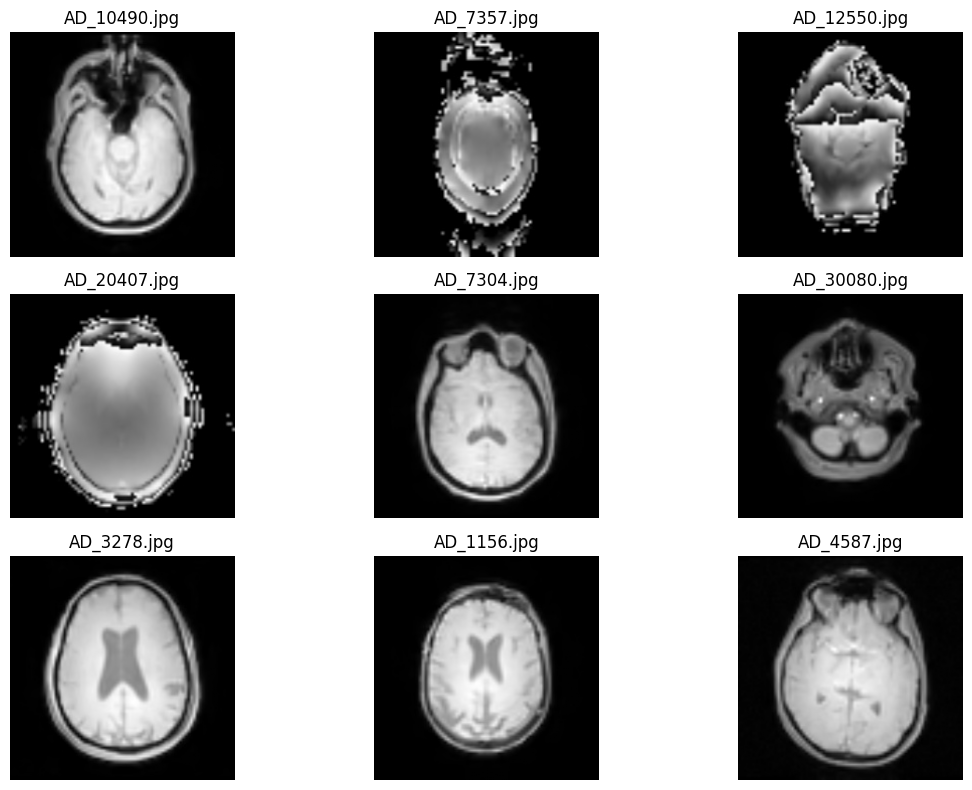

In [26]:
show_images_from_folder("/content/processed_ADNI/AD")

In [28]:
#Trains the model for 10 epochs.(epoch is one complete pass through the entire training dataset)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


791/791 ━━━━━━━━━━━━━━━━━━━━ 3007s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
791/791 ━━━━━━━━━━━━━━━━━━━━ 2991s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
791/791 ━━━━━━━━━━━━━━━━━━━━ 2949s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
791/791 ━━━━━━━━━━━━━━━━━━━━ 2925s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
791/791 ━━━━━━━━━━━━━━━━━━━━ 2933s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
791/791 ━━━━━━━━━━━━━━━━━━━━ 2963s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
791/791 ━━━━━━━━━━━━━━━━━━━━ 2945s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
791/791 ━━━━━━━━━━━━━━━━━━━━ 2946s

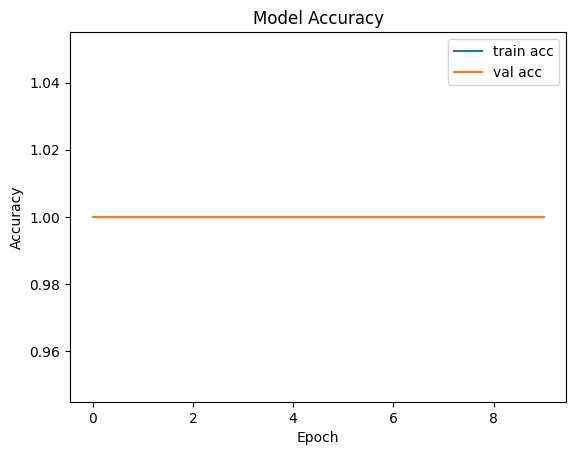

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [1]:
from google.colab import files
uploaded = files.upload()

Saving AD_dataset (1).zip to AD_dataset (1).zip


In [8]:
from zipfile import ZipFile

zip_path = "/content/AD_dataset (1).zip"
extract_dir = "/content/AD_dataset_data"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", extract_dir)

Files extracted to: /content/AD_dataset_data


In [11]:
import os

dcm_count = 0
for root, _, files in os.walk("/content/AD_dataset_data"):
    dcm_files = [f for f in files if f.endswith(".dcm")]
    if dcm_files:
        print(f"{root} → {len(dcm_files)} DICOM files")
        dcm_count += len(dcm_files)

print(f"\nTotal DICOM files found: {dcm_count}")

/content/AD_dataset_data/ADNI/006_S_6681/Axial_Field_Mapping/2019-02-12_13_30_31.0/I1148839 → 104 DICOM files
/content/AD_dataset_data/ADNI/006_S_6681/Axial_Field_Mapping/2022-03-17_13_27_51.0/I1557345 → 104 DICOM files
/content/AD_dataset_data/ADNI/019_S_6186/Axial_Field_Mapping_straight/2018-01-29_13_26_03.0/I958511 → 104 DICOM files
/content/AD_dataset_data/ADNI/053_S_6598/Axial_Field_Mapping/2018-10-11_11_50_29.0/I1058968 → 104 DICOM files
/content/AD_dataset_data/ADNI/053_S_6598/Axial_Field_Mapping/2019-10-29_16_31_35.0/I1249526 → 104 DICOM files
/content/AD_dataset_data/ADNI/123_S_4170/Axial_Field_Mapping/2019-03-06_14_13_32.0/I1139952 → 104 DICOM files
/content/AD_dataset_data/ADNI/123_S_4170/Axial_Field_Mapping/2019-10-18_07_39_14.0/I1242316 → 104 DICOM files
/content/AD_dataset_data/ADNI/123_S_4170/Axial_Field_Mapping/2020-10-07_11_58_02.0/I1346823 → 104 DICOM files
/content/AD_dataset_data/ADNI/016_S_6949/SWI_Images/2021-05-17_14_28_18.0/I1445768 → 56 DICOM files
/content/AD_

In [13]:
!pip install pydicom
!pip install pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.7 MB/s eta 0:00:00


In [14]:
import pydicom
import cv2
import numpy as np

def convert_dicom_to_jpg(dicom_dir, save_dir, class_label="AD"):
    output_path = os.path.join(save_dir, class_label)
    os.makedirs(output_path, exist_ok=True)
    count = 0

    for root, _, files in os.walk(dicom_dir):
        for file in files:
            if file.endswith(".dcm"):
                try:
                    dcm = pydicom.dcmread(os.path.join(root, file))
                    img = dcm.pixel_array
                    img = cv2.resize(img, (224, 224))
                    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
                    img = img.astype(np.uint8)
                    filename = os.path.join(output_path, f"{class_label}_{count}.jpg")
                    cv2.imwrite(filename, img)
                    count += 1
                except Exception as e:
                    print(f"Skipping {file}: {e}")

# Run conversion
convert_dicom_to_jpg("/content/AD_dataset_data", "/content/processed_ADNI", class_label="AD")

Skipping ADNI_177_S_6335_MR_Axial_3D_FLAIR_br_raw_20200806135413995_1_S951210_I1327464.dcm: OpenCV(4.12.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:1058: error: (-215:Assertion failed) image.channels() == 1 || image.channels() == 3 || image.channels() == 4 in function 'imwrite_'

Skipping ADNI_177_S_6409_MR_Axial_3D_FLAIR_br_raw_20200806150202302_1_S951229_I1327488.dcm: OpenCV(4.12.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:1058: error: (-215:Assertion failed) image.channels() == 1 || image.channels() == 3 || image.channels() == 4 in function 'imwrite_'

Skipping ADNI_177_S_6448_MR_Axial_3D_FLAIR_br_raw_20200919074637061_1_S961031_I1340862.dcm: OpenCV(4.12.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:1058: error: (-215:Assertion failed) image.channels() == 1 || image.channels() == 3 || image.channels() == 4 in function 'imwrite_'

Skipping ADNI_016_S_6939_MR_mIP_Images_SW__br_raw_20210519064239027_37_S1024865_I1444303.dcm: The number of bytes of pixel data is less than e

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    "/content/processed_ADNI",      # Replace with your actual path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    "/content/processed_ADNI",      # Replace with your actual path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 25304 images belonging to 1 classes.
Found 6326 images belonging to 1 classes.


In [16]:
import os

for root, dirs, files in os.walk("/content/processed_ADNI"):
    print(f"{root} → {len(files)} files")

/content/processed_ADNI → 0 files
/content/processed_ADNI/AD → 31630 files


In [17]:
import os
print("Current folders in /content:", os.listdir("/content"))


Current folders in /content: ['.config', 'AD_dataset (1).zip', 'processed_ADNI', 'AD_dataset_data', 'sample_data']


In [18]:
print("Current folders:", os.listdir("/content"))

Current folders: ['.config', 'AD_dataset (1).zip', 'processed_ADNI', 'AD_dataset_data', 'sample_data']


In [20]:
import os

for root, _, files in os.walk("/content/AD_T2_data"):
    dcm_count = len([f for f in files if f.endswith(".dcm")])
    if dcm_count > 0:
        print(f"{root} → {dcm_count} DICOM files")


Showing 25304 images from Training Set:


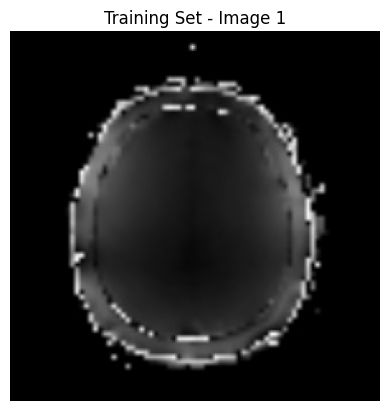

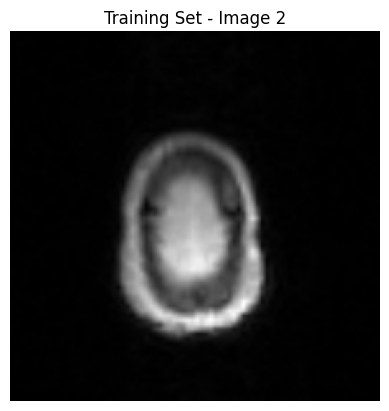

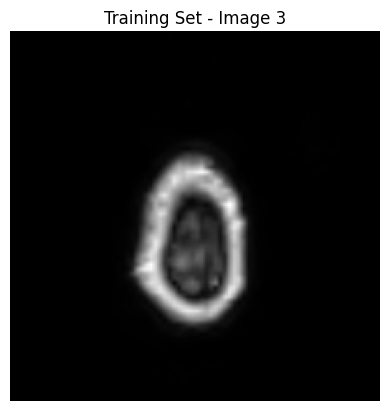

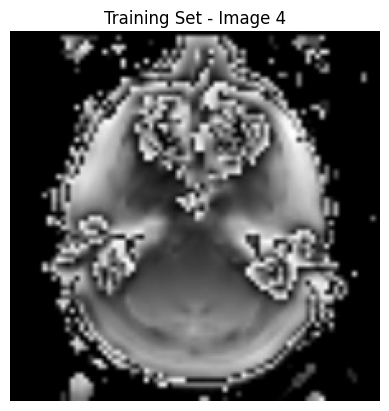

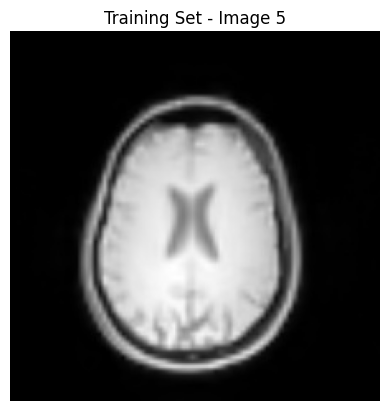

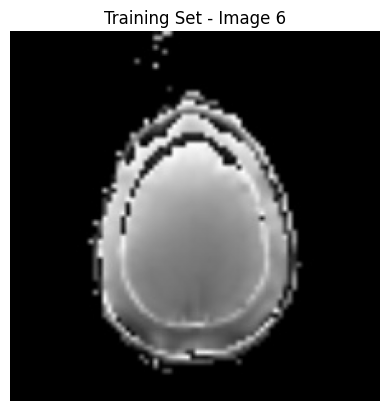

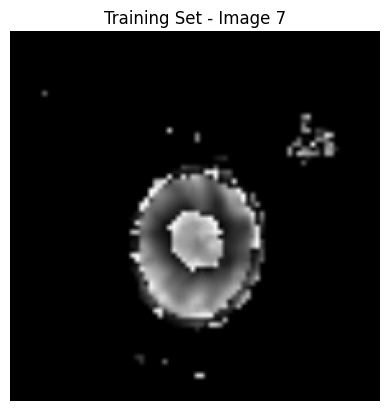

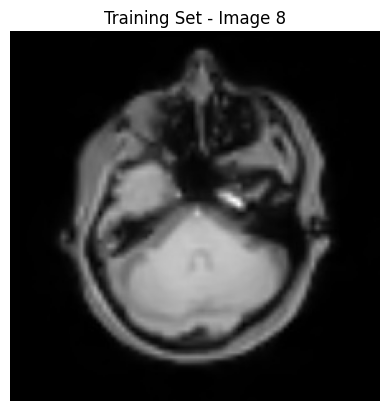

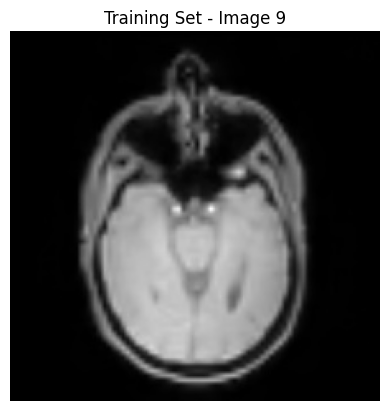

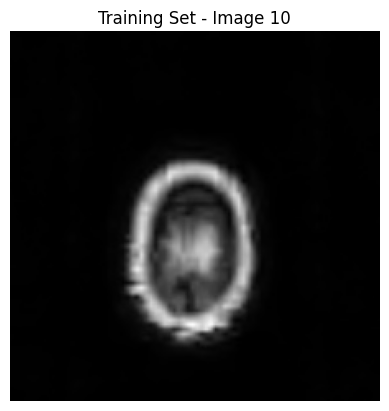

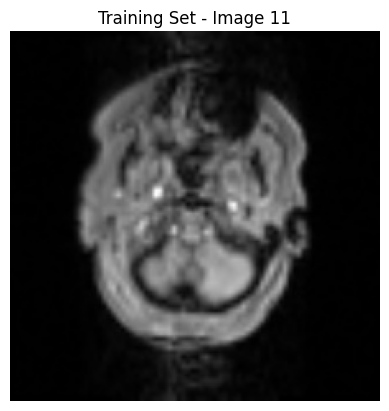

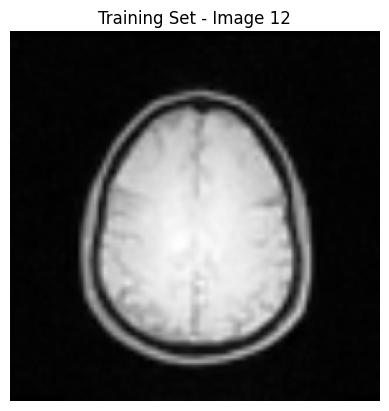

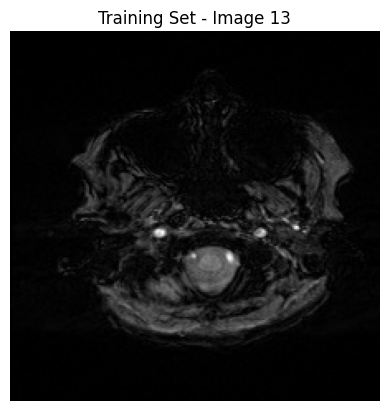

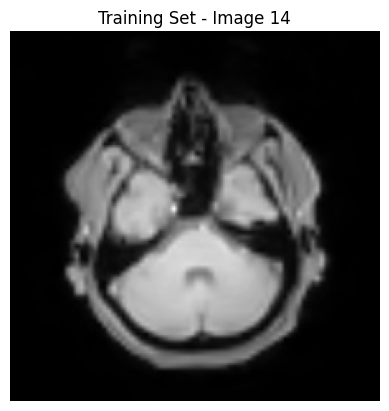

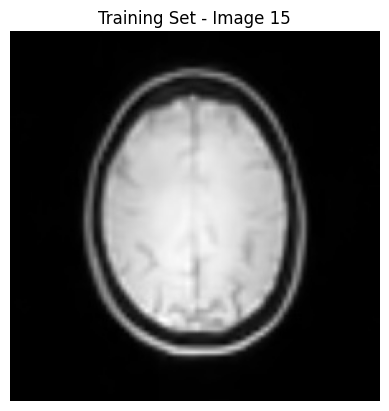

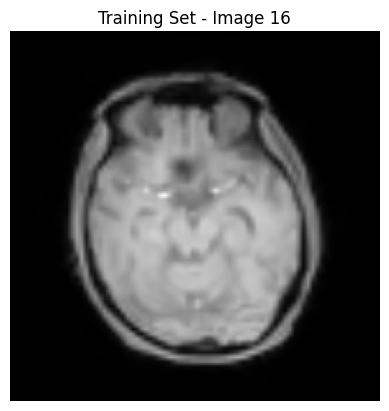

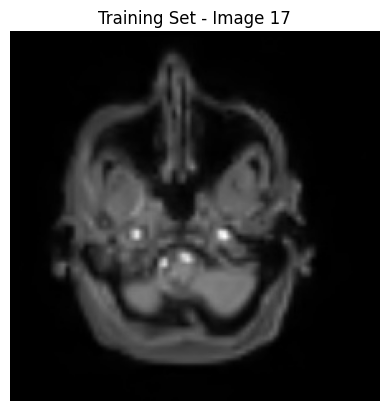

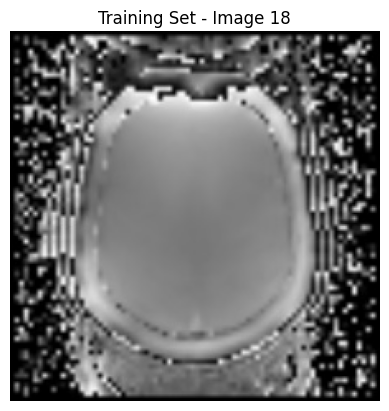

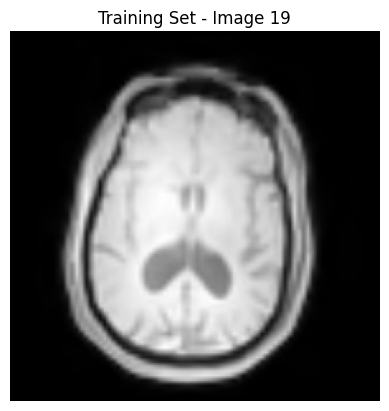

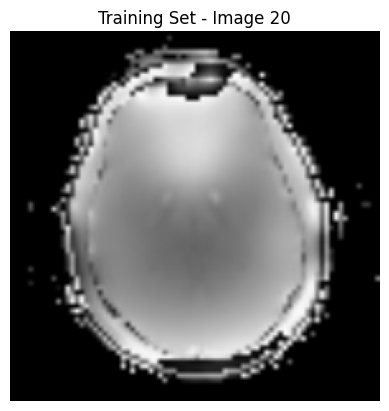

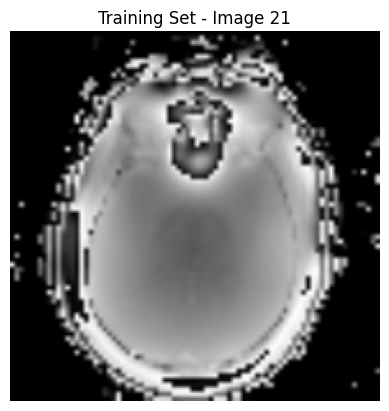

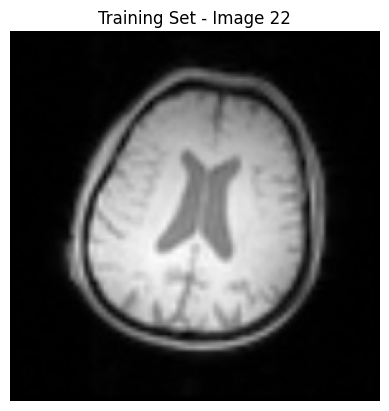

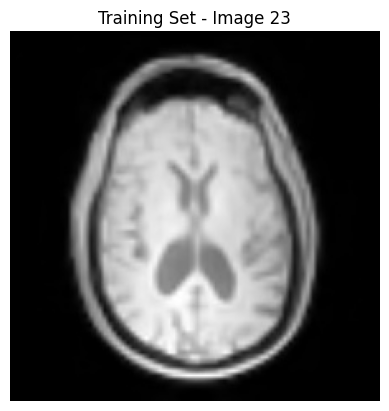

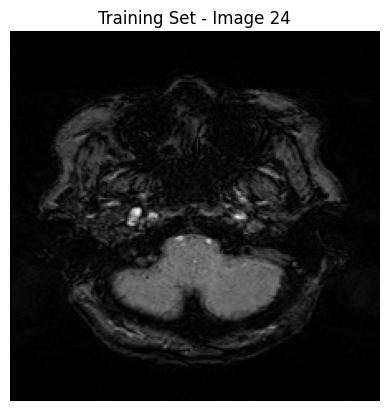

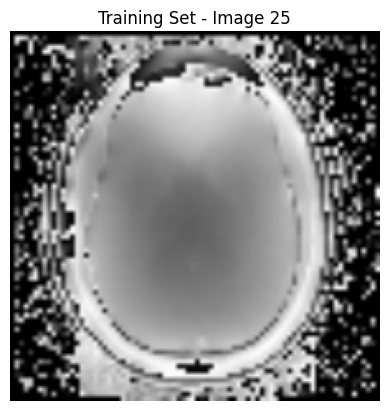

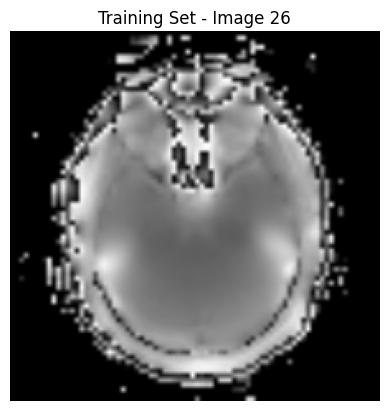

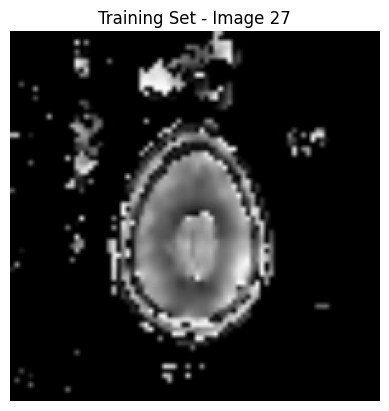

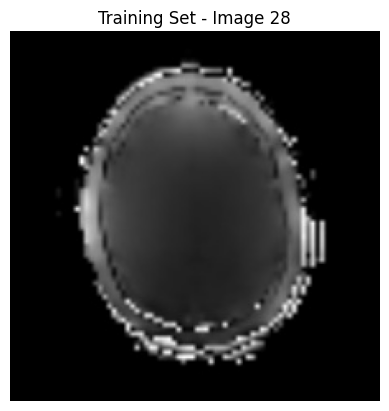

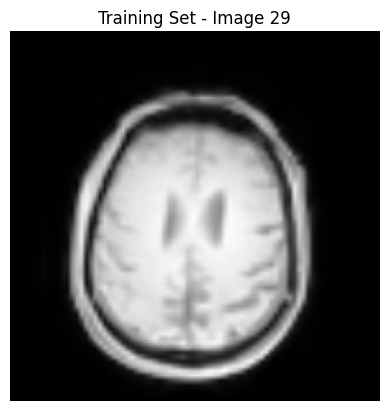

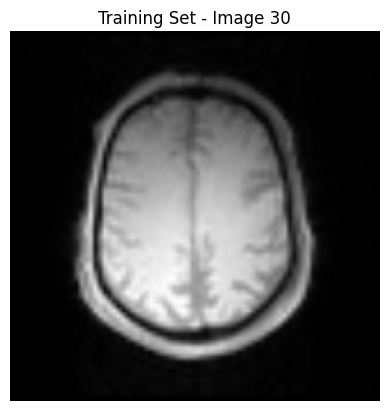

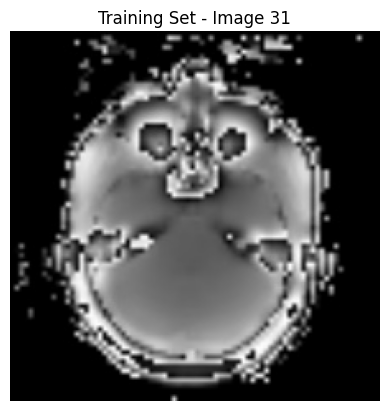

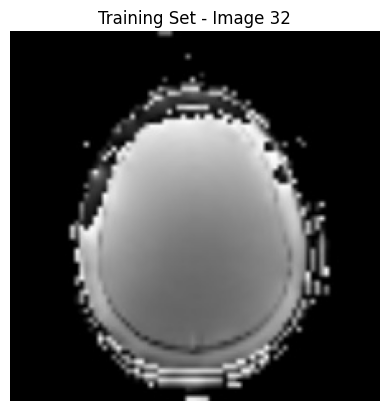

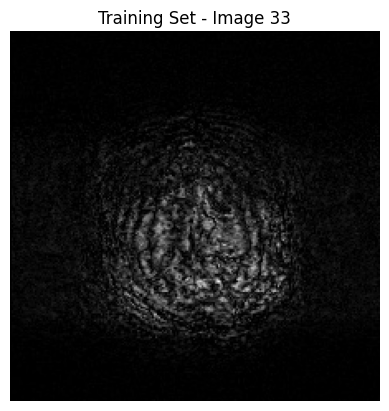

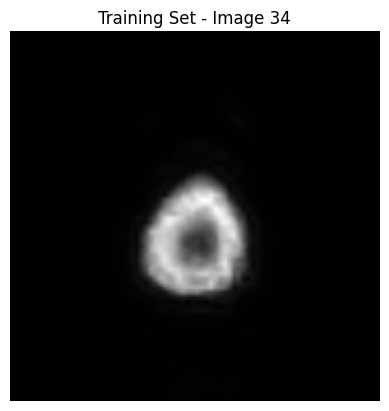

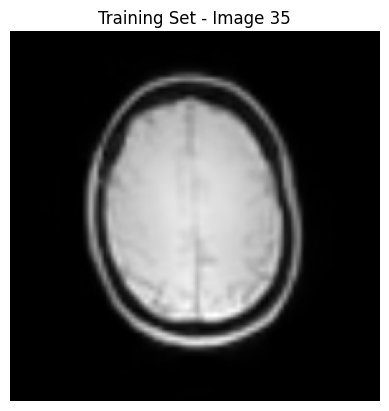

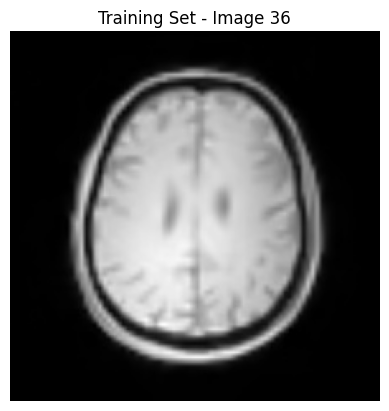

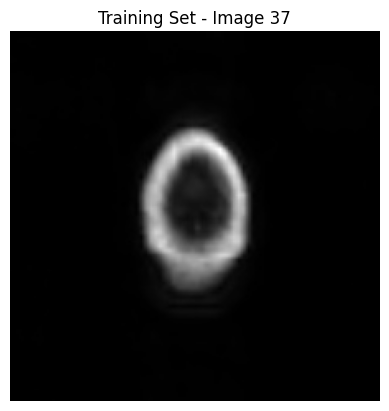

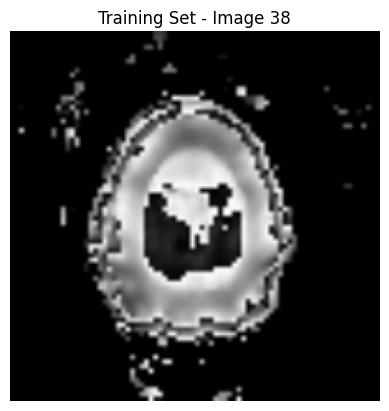

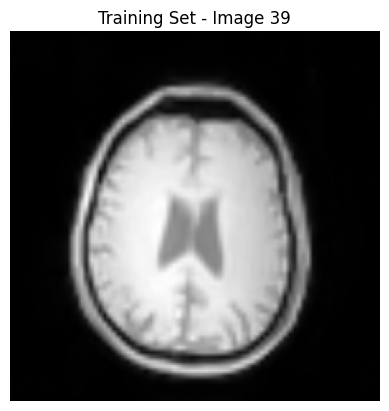

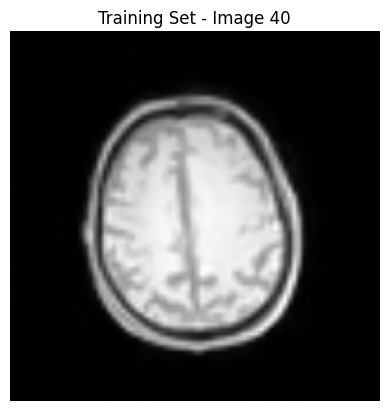

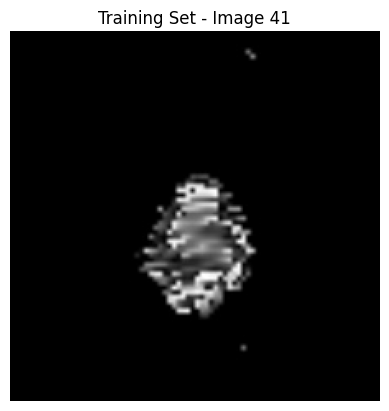

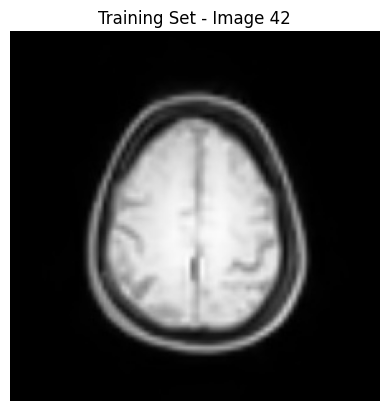

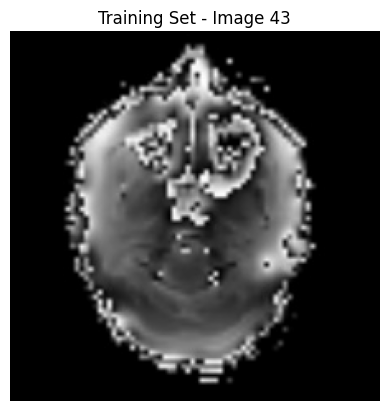

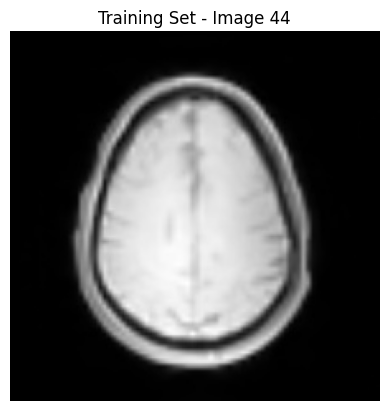

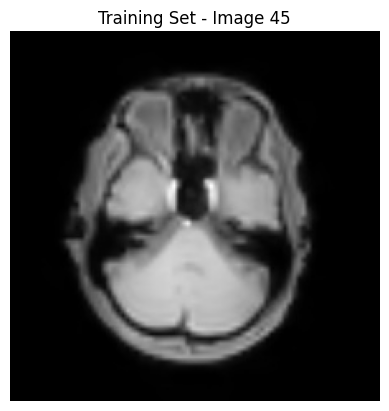

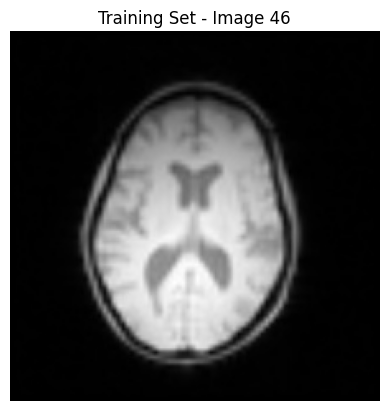

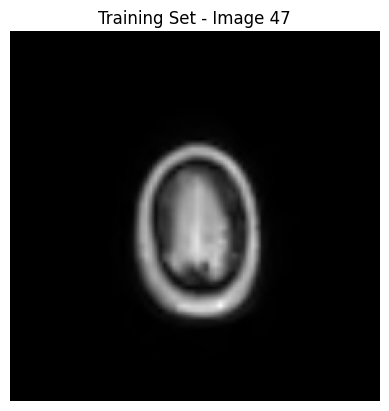

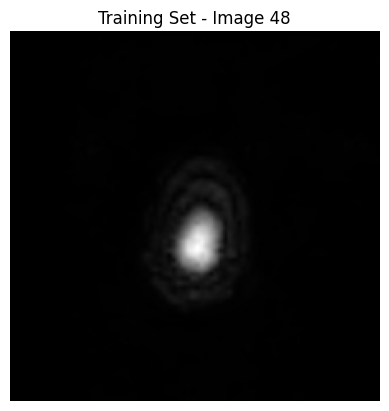

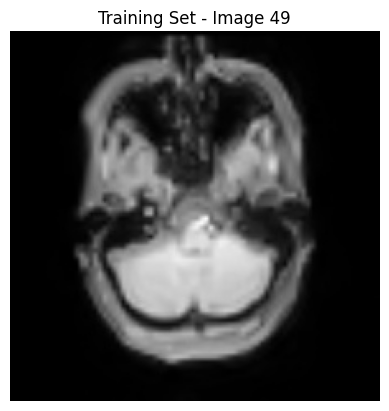

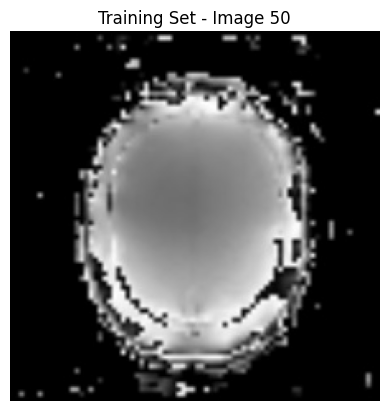

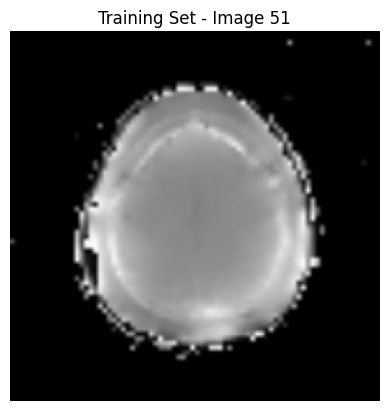

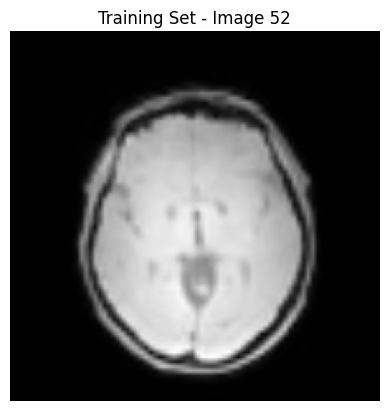

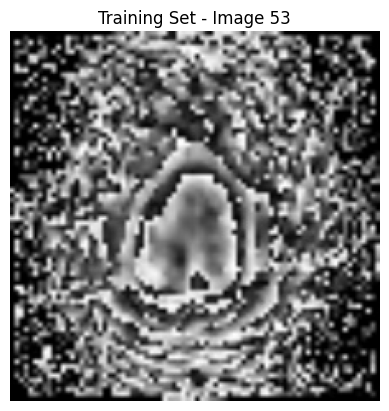

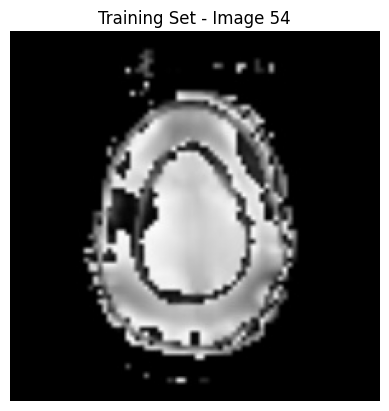

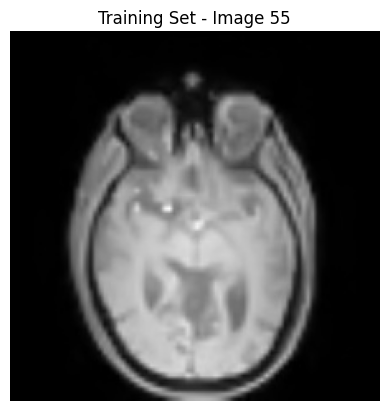

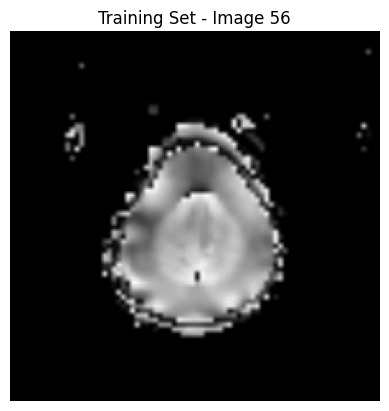

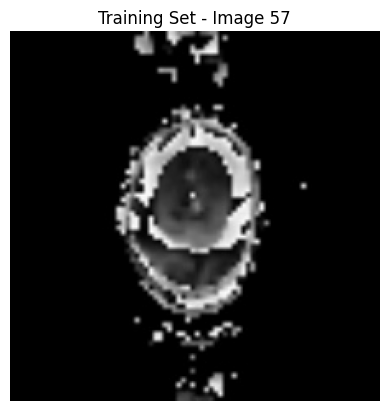

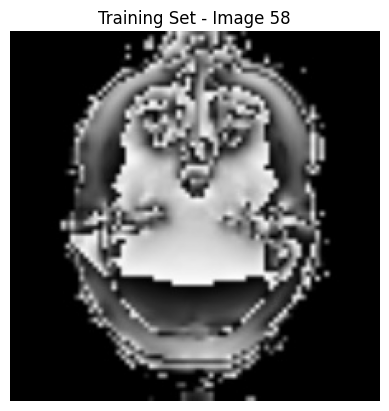

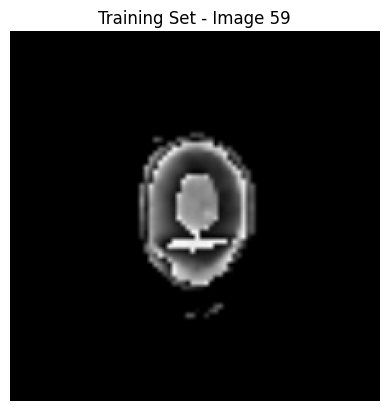

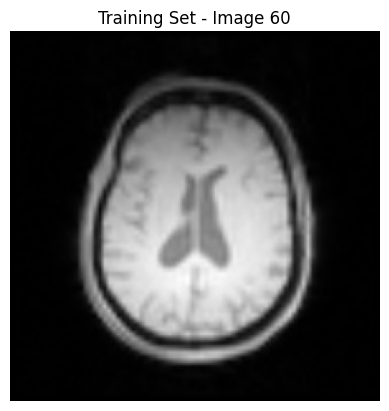

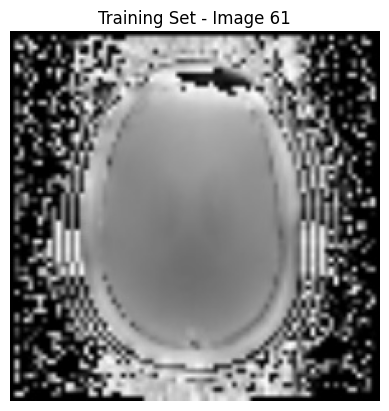

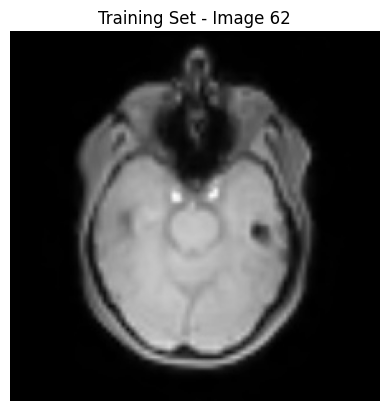

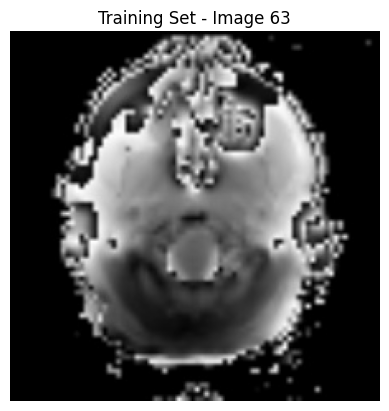

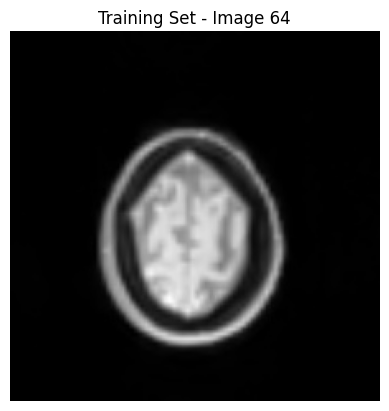

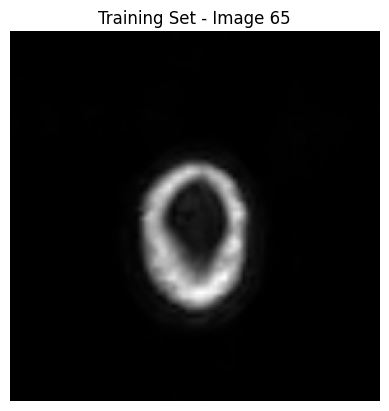

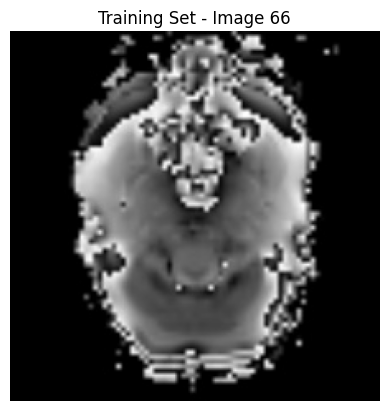

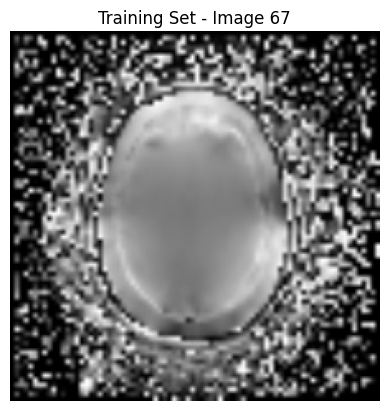

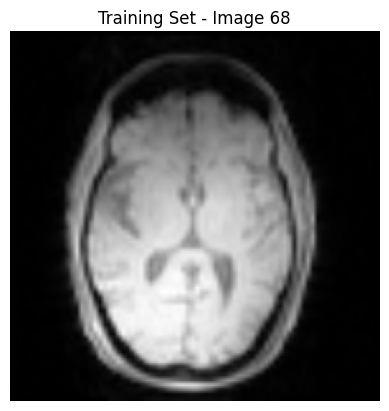

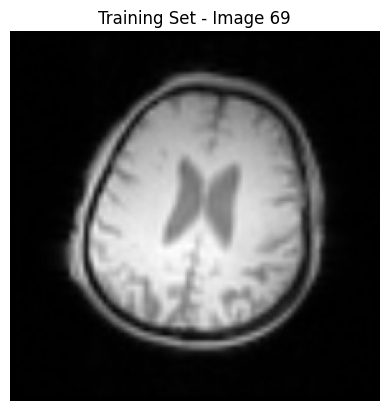

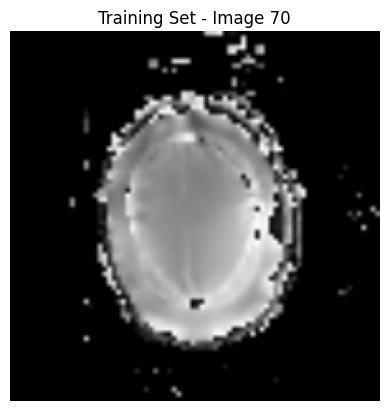

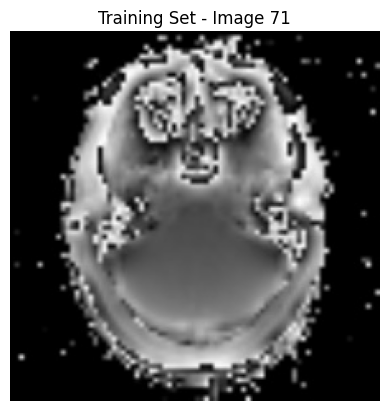

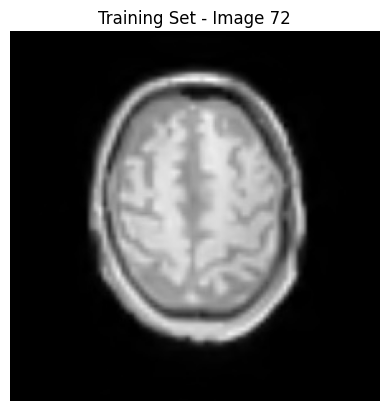

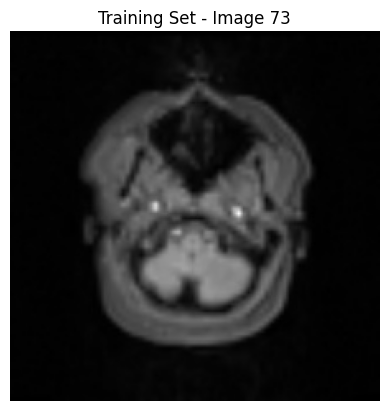

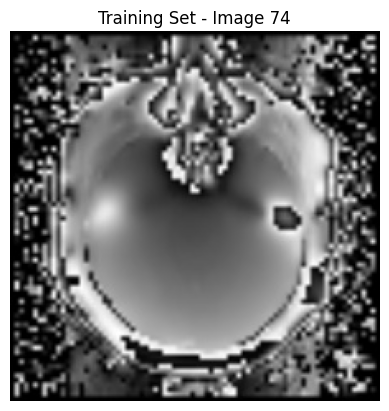

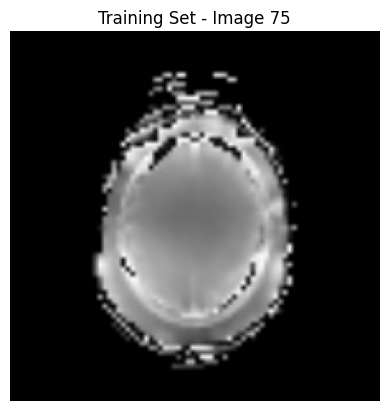

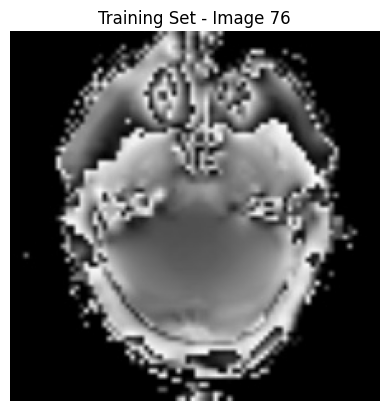

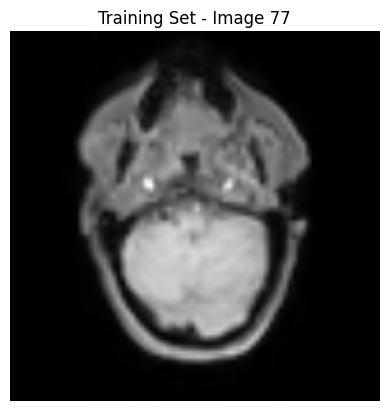

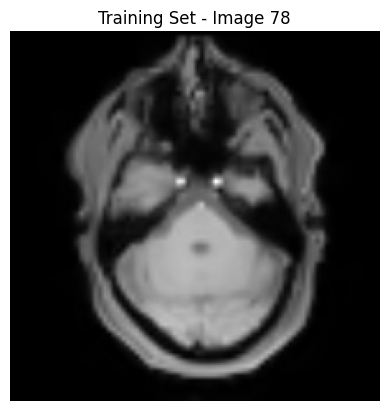

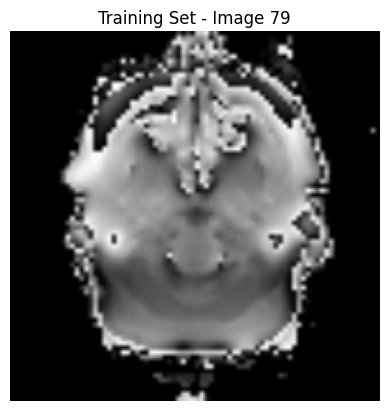

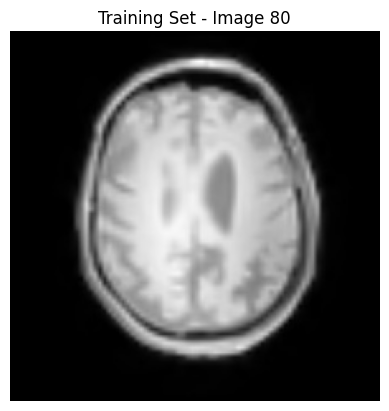

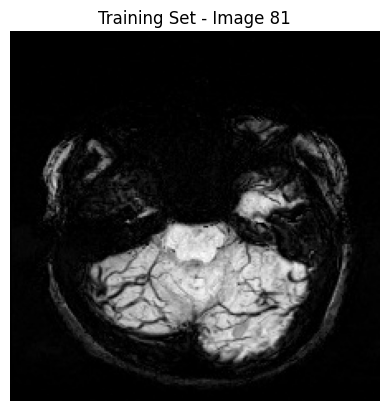

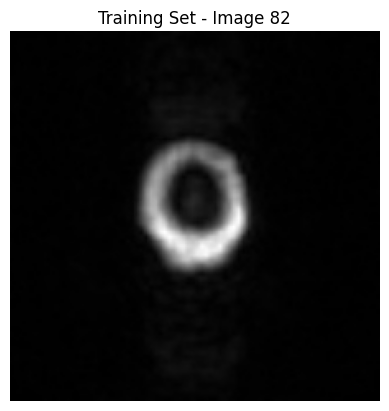

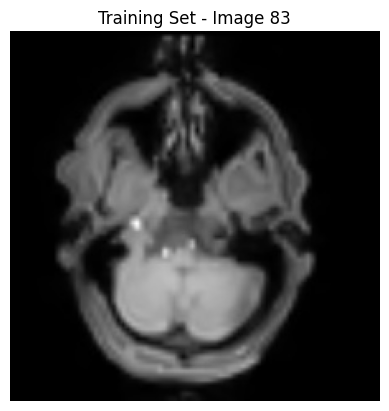

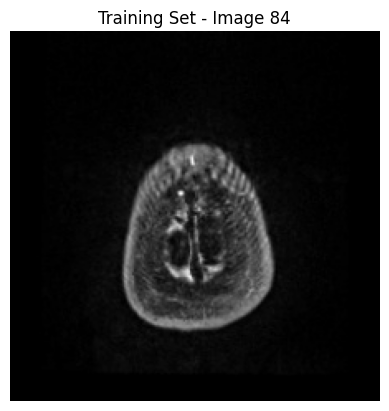

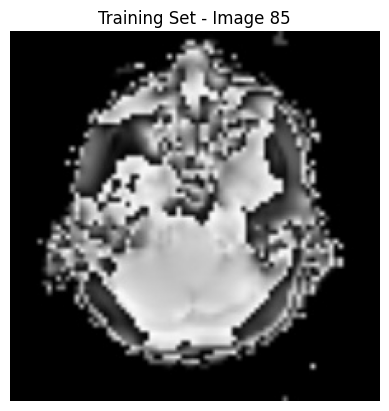

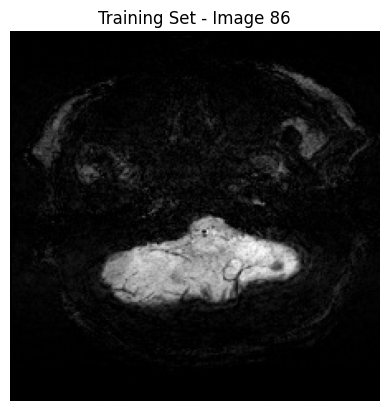

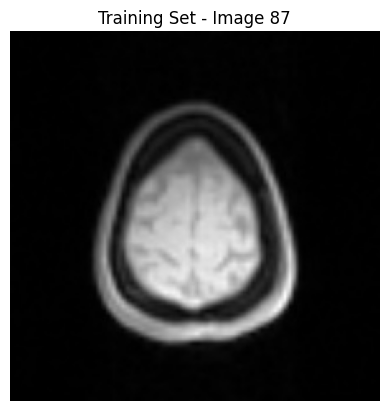

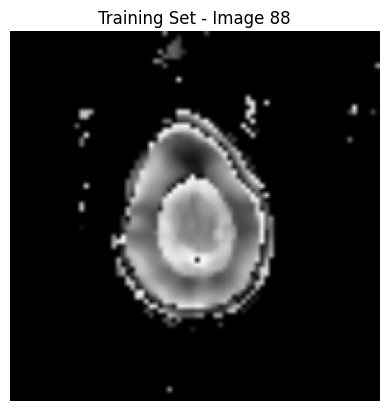

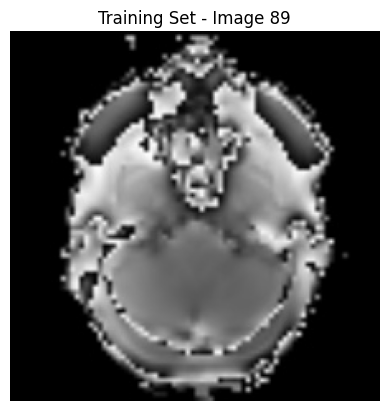

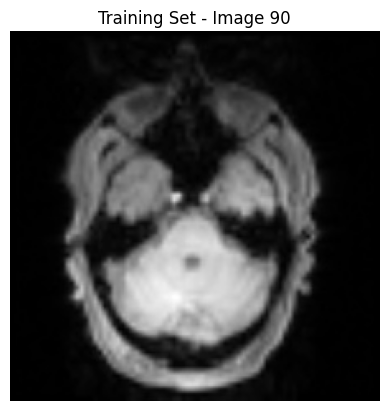

KeyboardInterrupt: 

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def show_generator_images(generator, title=""):
    total_images = generator.samples
    batch_size = generator.batch_size
    batches = int(np.ceil(total_images / batch_size))

    print(f"\nShowing {total_images} images from {title}:")

    count = 0
    for i in range(batches):
        images, labels = next(generator)
        for img in images:
            count += 1
            plt.imshow(img.squeeze(), cmap='gray')
            plt.title(f"{title} - Image {count}")
            plt.axis('off')
            plt.show()

# Reset generators before looping (to ensure starting from first batch)
train_gen.reset()
val_gen.reset()

# Show training images
show_generator_images(train_gen, title="Training Set")

# Show validation images
show_generator_images(val_gen, title="Validation Set")

In [22]:
import os
import pydicom
import cv2
import numpy as np

def convert_e1_e2_dicom_to_jpg(dicom_dir, save_dir, echo_range=(0, 30)):
    os.makedirs(save_dir, exist_ok=True)
    count = 0

    for root, _, files in os.walk(dicom_dir):
        for file in files:
            if file.endswith(".dcm"):
                try:
                    dcm_path = os.path.join(root, file)
                    dcm = pydicom.dcmread(dcm_path)
                    if hasattr(dcm, 'EchoTime'):
                        echo_time = float(dcm.EchoTime)
                        if echo_range[0] <= echo_time <= echo_range[1]:  # e1/e2 TE filter
                            img = dcm.pixel_array
                            img = cv2.resize(img, (224, 224))
                            img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
                            out_path = os.path.join(save_dir, f"e_echo_{count}.jpg")
                            cv2.imwrite(out_path, img)
                            count += 1
                except Exception as e:
                    print(f"Error: {file} → {e}")

    print(f"Saved {count} e1/e2 filtered images to: {save_dir}")


In [23]:
convert_e1_e2_dicom_to_jpg(
    dicom_dir="/content/AD_T2_data",
    save_dir="/content/e_echo_filtered",
    echo_range=(0, 30)  # covers both e1 and e2
)

Saved 0 e1/e2 filtered images to: /content/e_echo_filtered


In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Load your trained model
model = load_model("/content/mri_model.keras")

# Map class indices to labels (e.g., {'AD': 0, 'CN': 1, ...})
label_map = train_gen.class_indices
index_to_label = {v: k for k, v in label_map.items()}

# Predict on filtered e1/e2 images
def predict_echo_images(folder_path, model, show=True):
    image_paths = sorted(glob.glob(os.path.join(folder_path, "*.jpg")))
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        label = index_to_label[predicted_class]
        confidence = np.max(prediction)

        if show:
            plt.imshow(img)
            plt.title(f"Prediction: {label} ({confidence:.2f})")
            plt.axis('off')
            plt.show()

        print(f"{os.path.basename(img_path)} → {label} (Confidence: {confidence:.2f})")

ValueError: File not found: filepath=/content/mri_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
predict_echo_images("/content/e_echo_filtered", model)

In [ ]:
# Save the trained model
model.save("/content/mri_model.keras")
print("Model saved successfully!")

In [ ]:
#for predicting the images in the folder
import glob

test_folder = "/content/AD_dataset_PNG/Unsorted"  # or any folder with new images
image_paths = glob.glob(os.path.join(test_folder, "*.png"))[:10]  # change extension as needed

for img_path in image_paths:
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    pred = model.predict(img_array)
    predicted_label = class_names[np.argmax(pred)]

    print(f"{os.path.basename(img_path)} → {predicted_label}")


In [ ]:
import os
import pandas as pd
import numpy as np

# Step 1: Point to your image folder
image_folder = "/content/processed_ADNI/AD"  # Replace with your actual class folder path
image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpg")]

# Step 2: Create dummy severity scores (0–1 range)
np.random.seed(42)  # For reproducibility
severity_scores = np.random.rand(len(image_files))  # Random scores between 0 and 1

# Step 3: Create DataFrame
df = pd.DataFrame({
    "filename": image_files,
    "severity": severity_scores
})

# Step 4: Save CSV
csv_path = "/content/severity_labels.csv"
df.to_csv(csv_path, index=False)

print(f"CSV created with {len(df)} entries at {csv_path}")
df.head()

In [ ]:
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class MRIRegressionDataset(Sequence):
    def __init__(self, dataframe, image_dir, batch_size=32, image_size=(224, 224), shuffle=True):
        self.dataframe = dataframe.copy()
        self.image_dir = image_dir
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        batch_df = self.dataframe.iloc[index * self.batch_size:(index + 1) * self.batch_size]
        batch_images = []
        batch_labels = []

        for _, row in batch_df.iterrows():
            img_path = os.path.join(self.image_dir, row['filename'])
            img = load_img(img_path, target_size=self.image_size)
            img_array = img_to_array(img) / 255.0  # normalize
            batch_images.append(img_array)
            batch_labels.append(row['severity'])

        return np.array(batch_images), np.array(batch_labels)

    def on_epoch_end(self):
        if self.shuffle:
            self.dataframe = self.dataframe.sample(frac=1).reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/severity_labels.csv")

# Train/validation split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

train_gen = MRIRegressionDataset(train_df, image_folder, batch_size=16)
val_gen = MRIRegressionDataset(val_df, image_folder, batch_size=16)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='linear')  # regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)